In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
#bring in your data, jump to the right worksheet, skip some header rows
df = pd.read_excel('2018-04-10 150108.xls', sheetname='Results', skiprows= 40)
df.loc[df['Task'] == 'NTC', 'Sample Name'] = 'NTC'
df.loc[df['Task'] == 'STANDARD', 'Sample Name'] = 'STANDARD'                                                                           
df = df.loc[:, ['Sample Name','CT','Target Name','Quantity','Quantity Mean','Quantity SD']]
df.fillna(0, inplace=True)
# df.head()
df.to_csv('moda.csv')

In [3]:
#now we have a few rows with undetermined values, we'll clean things up here for dtype consistency
#so will replace 'undetermined' with 40, then change the dtype of the column
df.loc[df['CT'] == 'Undetermined', 'CT'] = 40
df['CT'] = df['CT'].apply(pd.to_numeric)
df.to_csv('modb.csv')
# df.dtypes

In [4]:
def f(row):
    if row.CT > 37:
        return row['Sample Name']+'***'
    else:
        return row['Sample Name']

df['Suspect Names'] = df.apply(f, axis=1)
df.to_csv('modb.csv')

In [5]:
def g(row):
    if row.CT > 37:
        return 0
    else:
        return row['Quantity Mean']

df['Quantity Mean1'] = df.apply(g, axis=1)
df.to_csv('modc.csv')

In [6]:
def g(row):
    if row.CT > 37:
        return 0
    else:
        return row['Quantity SD']

df['Quantity SD1'] = df.apply(g, axis=1)
df.to_csv('modd.csv')

In [7]:
df = df.sort_values(by='CT', ascending=False)
df.head()

,Sample Name,CT,Target Name,Quantity,Quantity Mean,Quantity SD,Suspect Names,Quantity Mean1,Quantity SD1
155,NTC,40.0,209 KAN,0.0,0.0,0.0,NTC***,0.0,0.0
148,NTC,40.0,EPO set2,0.0,0.0,0.0,NTC***,0.0,0.0
154,NTC,40.0,209 KAN,0.0,0.0,0.0,NTC***,0.0,0.0
153,NTC,40.0,EPO set2,0.0,0.0,0.0,NTC***,0.0,0.0
152,NTC,40.0,EPO set2,0.0,0.0,0.0,NTC***,0.0,0.0


In [8]:
#finally, time to drop some pesky duplicate rows! and some sanity checks
df = df.drop_duplicates(['Sample Name', 'Target Name'])
df = df.loc[df['Sample Name'] != 'STANDARD']
df.to_csv('mode.csv')
#good looking file!!!

In [9]:
df = df.loc[:, ['Sample Name', 'Suspect Names','Target Name', 'Quantity Mean1','Quantity SD1']]
df.head()

,Sample Name,Suspect Names,Target Name,Quantity Mean1,Quantity SD1
155,NTC,NTC***,209 KAN,0.000000e+00,0.000000e+00
148,NTC,NTC***,EPO set2,0.000000e+00,0.000000e+00
110,mRNA 0.03 RNaseI,mRNA 0.03 RNaseI***,209 KAN,0.000000e+00,0.000000e+00
130,mRNA 0.3 RNaseI,mRNA 0.3 RNaseI***,209 KAN,0.000000e+00,0.000000e+00
134,mRNA 0.01,mRNA 0.01,209 KAN,1.418906e-07,1.877650e-09


In [10]:
genes = df['Target Name'].unique()
genes

array(['209 KAN', 'EPO set2'], dtype=object)

In [11]:
def bahchaht(arrayoflabels, arrayofvalues, arrayofstd, genename):
    N = len(arrayoflabels)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots(figsize=(10,10))
    rects1 = ax.bar(ind, arrayofvalues, width, color='r', yerr= arrayofstd)
    ax.set_ylabel('Quantity')
    ax.set_title(genename)
#     plt.figure(figsize=(20,10))
    ax.set_xticks(ind)# + width / 2)
    plt.xticks(rotation=90)
    ax.set_xticklabels(arrayoflabels)

In [12]:
#now we want to allow the users to reorder the samples in the graph!!!
#lets give them an excel file they can go fill out!!!
names = df['Sample Name'].unique()
names= pd.DataFrame(names)
names.head()
names.columns = ['Sample Name']
names.to_excel('Sample Name.xlsx', index=False)

HEY YOU CRAZY END USER, GO MODIFY THE 'Sample Name' EXCEL SHEET. ADD A SECOND COLUMN CALLED 'number' AND PUT THE NUMBER YOU'D LIKE YOUR SAMPLES ORDERED BY THERE. SAVE THE FILE.

In [14]:
names1 = pd.read_excel('Sample Name.xlsx')
result = pd.merge(names1, df, on='Sample Name', how='outer')
result = result.sort_values(by=['number'])
result.head()

,Sample Name,number,Suspect Names,Target Name,Quantity Mean1,Quantity SD1
0,mRNA 0.01,1,mRNA 0.01,209 KAN,1.418906e-07,1.877650e-09
1,mRNA 0.01,1,mRNA 0.01,EPO set2,1.186398e-06,8.352968e-08
2,mRNA 0.03,2,mRNA 0.03,209 KAN,2.150908e-07,6.771233e-09
3,mRNA 0.03,2,mRNA 0.03,EPO set2,2.801826e-06,2.793436e-07
4,mRNA 0.03 RNaseI,3,mRNA 0.03 RNaseI***,209 KAN,0.000000e+00,0.000000e+00


209 KAN
EPO set2


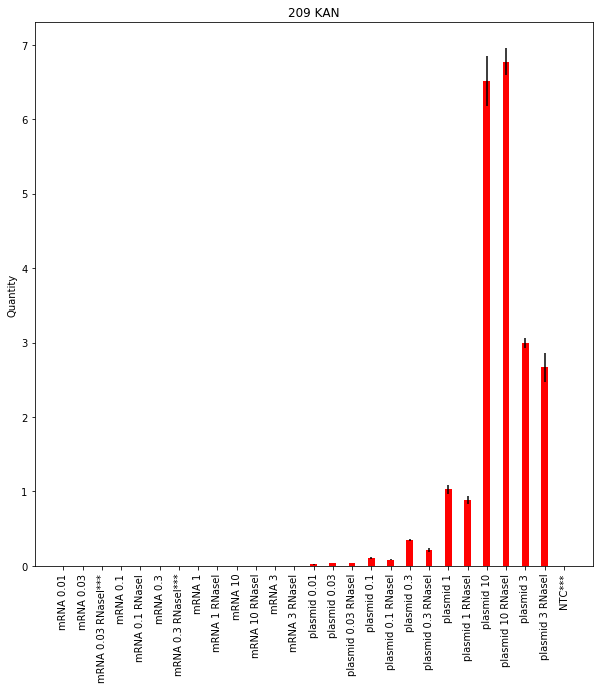

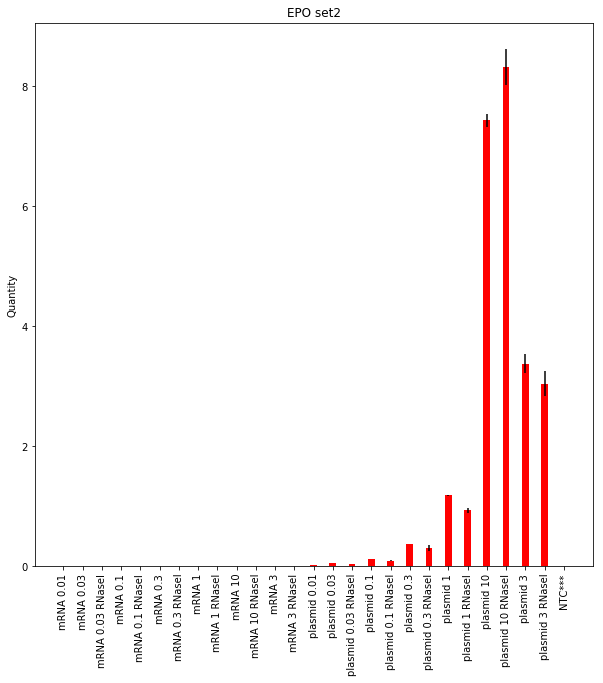

In [15]:
for g in genes:
    print(g)
    aol = result.loc[result['Target Name'] == g]
    arrayoflabels = np.array(aol['Suspect Names'])
    arrayofvalues = np.array(aol['Quantity Mean1'])
    arrayofstd = np.array(aol['Quantity SD1'])
#     print(arrayoflabels)
#     print(arrayofvalues)
#     print(arrayofstd)
    bahchaht(arrayoflabels, arrayofvalues, arrayofstd, g)